In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize_image(images):
    mean = np.mean(images)
    std = np.std(images)
    image_normalized = (images - mean) / std
    return image_normalized 


In [8]:
gen_samples.shape

(45, 3, 32, 32)

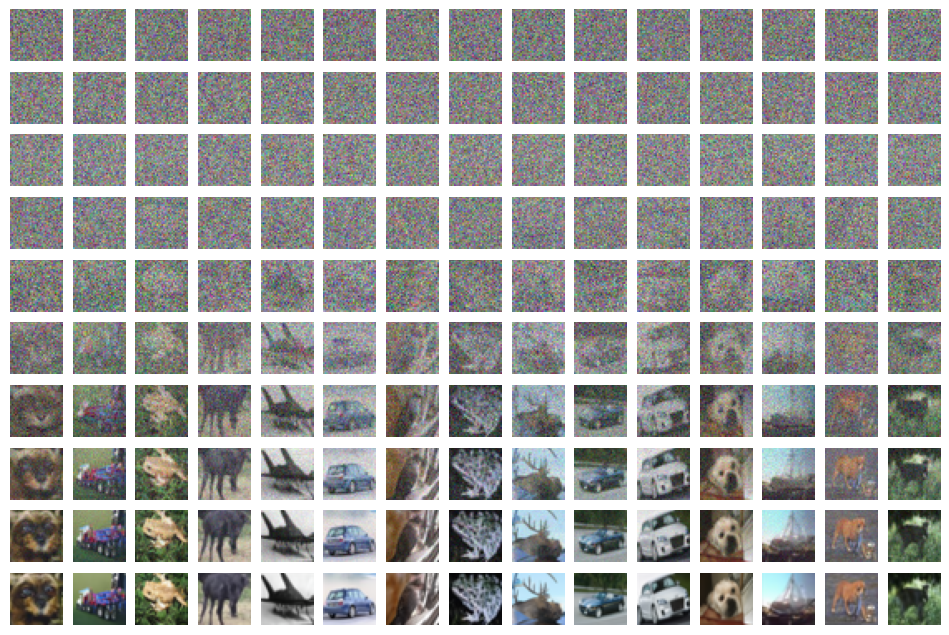

In [58]:
n=36
# Create a new figure
plt.figure(figsize=(12,8))
# Number of rows/columns in the grid
grid_size = 10
counter = 1
indices = np.random.choice(range(n), size=15, replace=False)

for i in range(0, 10):
    file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/intermediate_images/{i+1}/ray16.npz'
    data = np.load(file_path)
    gen_samples = data['images']
    gen_samples =  normalize_image(gen_samples)
    gen_samples = np.interp(gen_samples, 
                            (gen_samples.min(), gen_samples.max()), 
                            (0, 1))
    images = gen_samples[indices]

    if images.shape[1]==3:
        images = images.transpose(0,2,3,1)

    # Loop over the images
    for j in range(15):
        # Create a subplot for each image
        plt.subplot(grid_size, 15, counter)
        # Display the image
        plt.imshow(images[j])
        # Remove the axes
        plt.axis('off')
        counter += 1

    # Show the figure
plt.show()

In [51]:
import os
# Get a list of all files in the directory
dir_path = '/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/fids/'
files = os.listdir(dir_path)
fid_iteration = np.zeros(10)
for file in files:
    i = int(file.split('.')[0])
    data = np.load(os.path.join(dir_path, file))
    fid = data['fid']
    fid_iteration[i-1] = fid

In [52]:
save_combines_path = '/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/base_2.npz'
np.savez(save_combines_path, all_fids=fid_iteration)

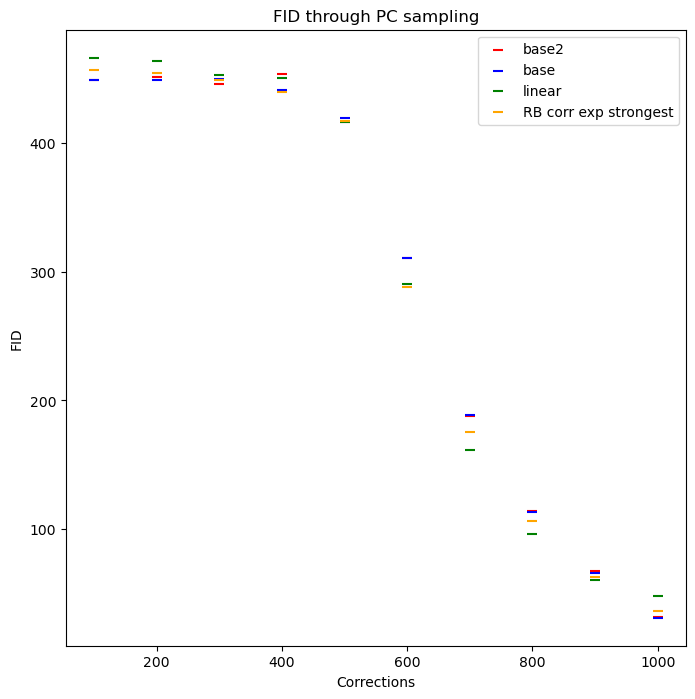

[449.04 448.93 449.39 441.48 419.64 310.87 188.44 113.12  66.12  31.21]
[466.19 463.82 453.02 450.23 416.48 290.54 161.11  96.04  60.38  48.  ]
[454.95 454.97 452.81 444.65 416.39 285.67 170.67 100.75  60.45  43.49]
[453.31 453.29 441.79 443.79 420.8  309.43 186.65 113.79  65.47  31.7 ]
[458.07 462.56 453.72 449.67 420.58 301.3  182.39 109.22  63.38  33.34]
[456.68 454.51 448.55 439.83 416.74 287.95 175.51 106.55  62.69  36.54]


In [4]:
plt.figure(figsize=(8,8))
s=50

data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/base_2.npz')
fid_iteration_0 = data['all_fids']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/base.npz')
fid_iteration = data['all_fids']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/0.7_linear_decrease.npz')
fid_iteration1 = data['all_fids']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/0.7_300_linear_RB_corr.npz')
fid_iteration2 = data['all_fids']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/0.84_250_exp_RB_corr.npz')
fid_iteration3 = data['all_fids']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/0.84_350_exp_RB_corr.npz')
fid_iteration4 = data['all_fids']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/0.95_350_exp_RB_corr.npz')
fid_iteration5 = data['all_fids']
plt.scatter(np.arange(100, 1001, 100), fid_iteration_0, marker='_', c='r',
            label='base2', s=s)
plt.scatter(np.arange(100, 1001, 100), fid_iteration, marker='_', c='b',
            label='base', s=s)
plt.scatter(np.arange(100, 1001, 100), fid_iteration1, marker='_', c='g',
            label='linear', s=s)
# plt.scatter(np.arange(100, 1001, 100), fid_iteration2, marker='_', c='orange',
#             label='RB corr', s=s)
# plt.scatter(np.arange(100, 1001, 100), fid_iteration3, marker='_', c='pink',
#             label='RB corr exp', s=s)
# plt.scatter(np.arange(100, 1001, 100), fid_iteration4, marker='_', c='black',
#             label='RB corr exp stronger', s=s)
plt.scatter(np.arange(100, 1001, 100), fid_iteration5, marker='_', c='orange',
            label='RB corr exp strongest', s=s)
plt.title('FID through PC sampling')
plt.ylabel('FID')
# plt.yscale('log')
plt.xlabel('Corrections')
plt.legend()
plt.show()
print(fid_iteration.round(2))
print(fid_iteration1.round(2))
print(fid_iteration2.round(2))
print(fid_iteration3.round(2))
print(fid_iteration4.round(2))
print(fid_iteration5.round(2))